### Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# load the dataset
hotel_bookings = pd.read_csv("hotel_bookings.csv")

In [4]:
hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data cleaning

In [5]:
# Check for missing values again
missing_values = hotel_bookings.isnull().sum()

# Filter out columns that have missing values for further examination
missing_values = missing_values[missing_values > 0]

print(missing_values)

children         4
country        488
agent        16340
company     112593
dtype: int64


In [6]:
# Imputing missing values
hotel_bookings["children"].fillna(0, inplace=True)
hotel_bookings["country"].fillna("Unknown", inplace=True)
hotel_bookings["agent"].fillna(0, inplace=True)
hotel_bookings["company"].fillna(0, inplace=True)

# Verify that there are no more missing values
missing_after_imputation = hotel_bookings.isnull().sum().sum()

print(missing_after_imputation)

0


In [7]:
# Check data types of each column
data_types = hotel_bookings.dtypes

print(data_types)

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# Categorical columns

cat_columns = ['hotel', 'is_canceled', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


# Unique values in each categorical column

print(f"Unique values by categorical columns\n".upper())

for cat_column in cat_columns:
    unique_values = hotel_bookings[cat_column].unique()
    print(f"\n{cat_column}: \n{unique_values}\n")
    print('-' * 70)

UNIQUE VALUES BY CATEGORICAL COLUMNS


hotel: 
['Resort Hotel' 'City Hotel']

----------------------------------------------------------------------

is_canceled: 
[0 1]

----------------------------------------------------------------------

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

----------------------------------------------------------------------

country: 
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'Unknown' 'ROU' 'NOR' 'OMN' 'ARG'
 'POL' 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS'
 'EST' 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX'
 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF'
 'AGO' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN'
 'JAM' 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL'
 'GGY' 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL'
 'SEN' 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA'
 'CUB' 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CI

In [9]:
#Replacing 'undefined' meal with 'SC'

hotel_bookings['meal'].replace(to_replace = 'Undefined', value = 'SC', inplace = True)

In [10]:
# Convert 'reservation_status_date' to a datetime data type
hotel_bookings['reservation_status_date'] = pd.to_datetime(hotel_bookings['reservation_status_date'])

In [11]:
# Check for bookings with no guests
no_guests = hotel_bookings[(hotel_bookings['adults'] == 0) & 
                       (hotel_bookings['children'] == 0) & 
                       (hotel_bookings['babies'] == 0)]

# Check for bookings with zero total stay but not cancelled
zero_stay = hotel_bookings[(hotel_bookings['stays_in_weekend_nights'] == 0) & 
                       (hotel_bookings['stays_in_week_nights'] == 0) & 
                       (hotel_bookings['is_canceled'] == 0)]

print(len(no_guests), len(zero_stay))

180 680


In [12]:
# Removing inconsistent records

# Remove bookings with no guests
hotel_bookings = hotel_bookings[~((hotel_bookings['adults'] == 0) & 
                          (hotel_bookings['children'] == 0) & 
                          (hotel_bookings['babies'] == 0))]

# Remove bookings with zero total stay but not cancelled
hotel_bookings = hotel_bookings[~((hotel_bookings['stays_in_weekend_nights'] == 0) & 
                          (hotel_bookings['stays_in_week_nights'] == 0) & 
                          (hotel_bookings['is_canceled'] == 0))]

In [13]:
# Check for duplicate rows
duplicate_rows = hotel_bookings[hotel_bookings.duplicated()]

# Number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

num_duplicate_rows

31926

In [14]:
# Removing duplicate rows
hotel_bookings = hotel_bookings.drop_duplicates()

### Exploratory Data Analysis

In [15]:
# Statistical summaries for numerical columns
statistical_summaries = hotel_bookings.describe()

statistical_summaries

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662.000000,86662
mean,0.277042,80.277469,2016.212215,26.819621,15.818006,1.011193,2.641123,1.880409,0.139265,0.010858,0.036302,0.030555,0.184371,0.268180,80.966687,10.932658,0.750052,107.216171,0.084674,0.700122,2016-08-31 14:27:37.141538304
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.860000,0.000000,0.000000,2016-03-18 00:00:00
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,99.000000,0.000000,0.000000,2016-09-08 00:00:00
75%,1.000000,125.750000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.400000,0.000000,1.000000,2017-03-06 00:00:00
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.447540,86.069128,0.685931,13.653116,8.836041,1.027535,2.035377,0.622267,0.456838,0.113825,0.187042,0.370486,1.736924,0.709906,109.922461,53.872101,10.028099,54.386968,0.282226,0.832610,NaN


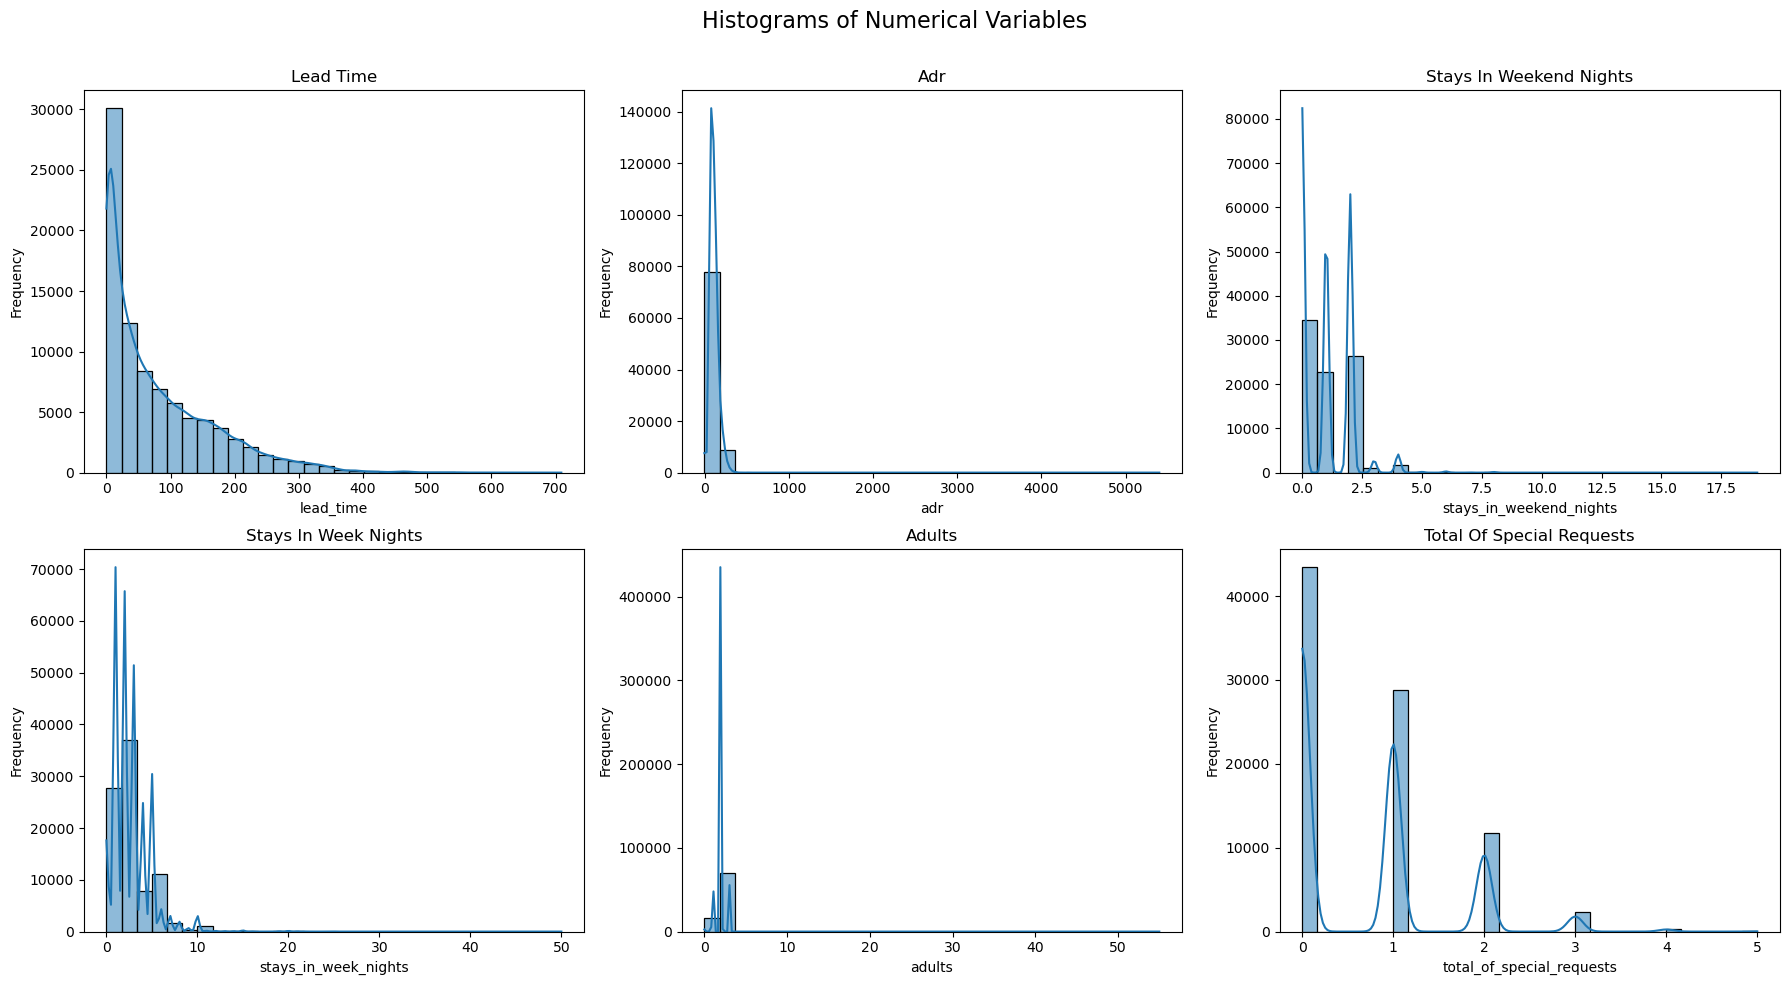

In [16]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Histograms of Numerical Variables', fontsize=16)

# List of variables to plot
variables = ['lead_time', 'adr', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'total_of_special_requests']

# Plot histograms
for ax, variable in zip(axes.ravel(), variables):
    sns.histplot(hotel_bookings[variable], bins=30, ax=ax, kde=True)
    ax.set_title(variable.replace("_", " ").title())
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

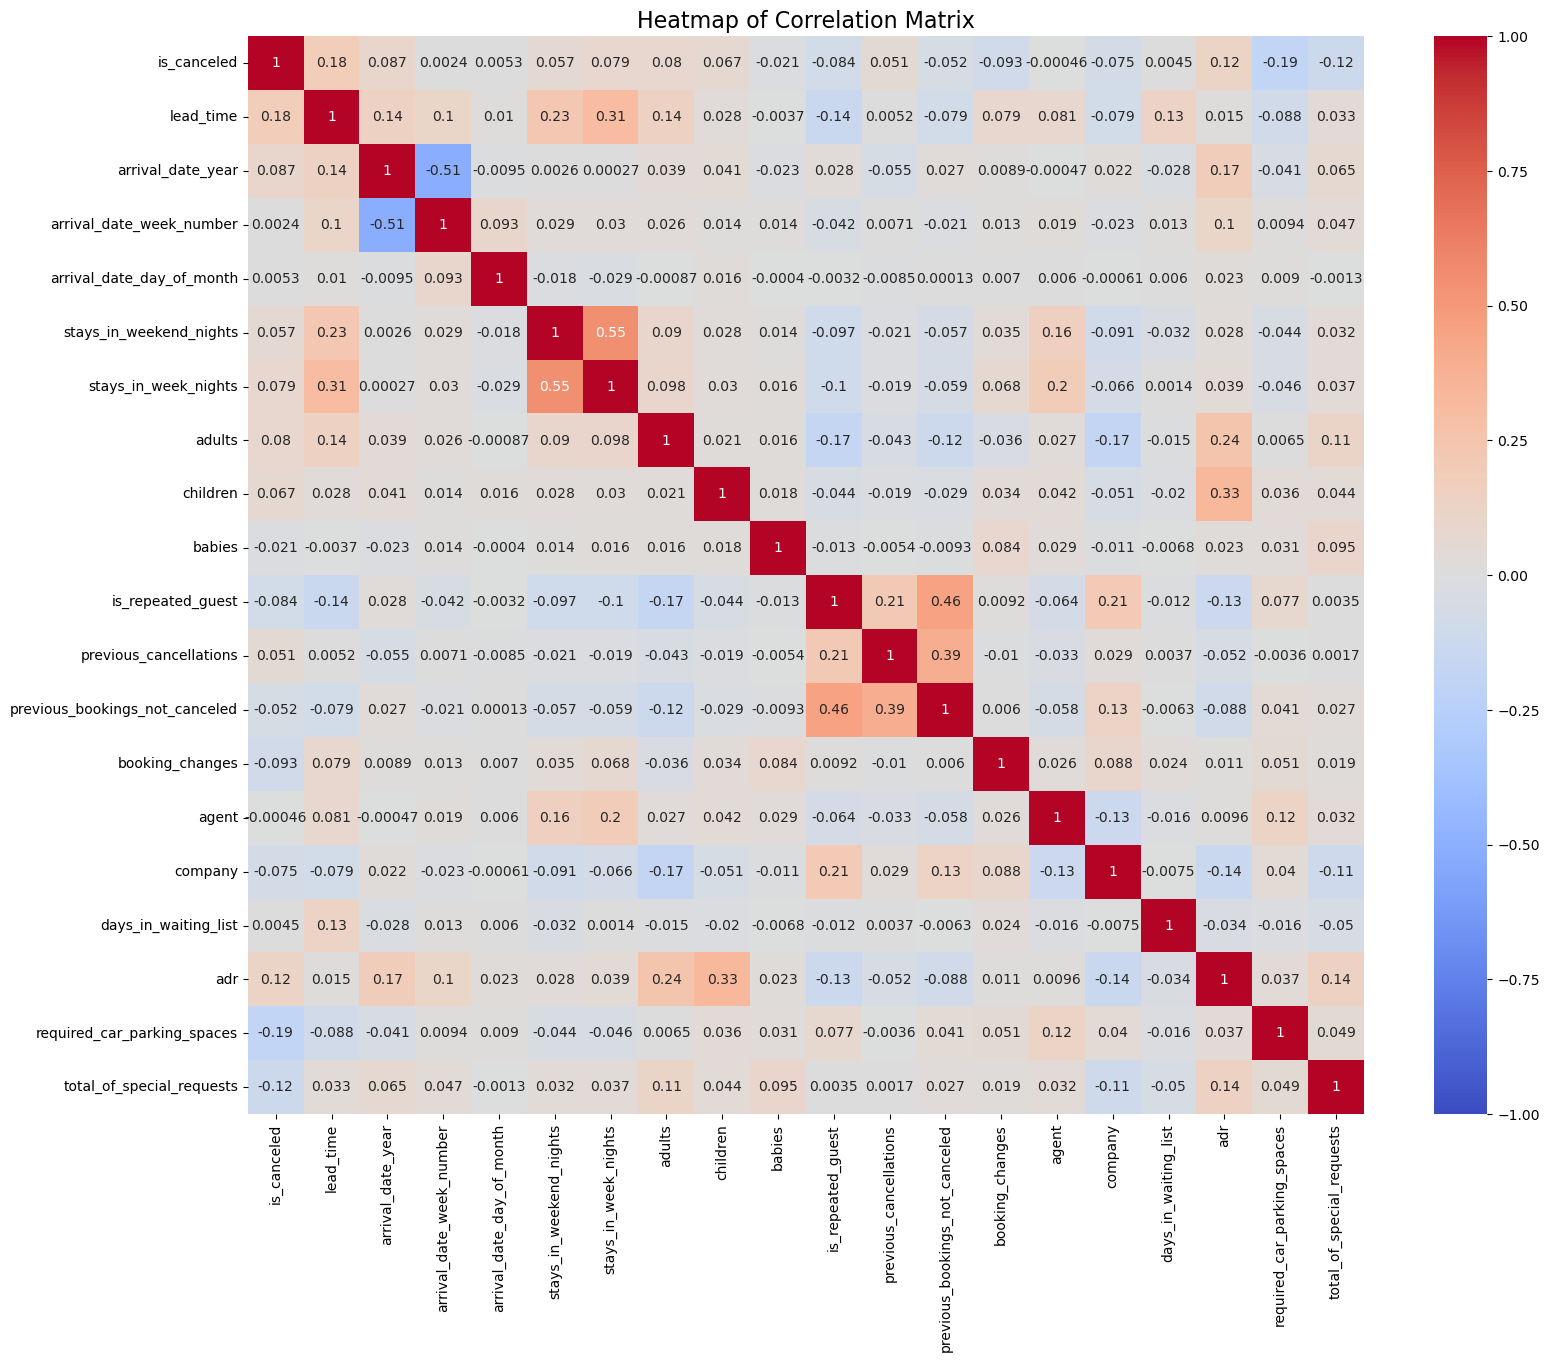

In [17]:
# Filter out non-numeric columns
numeric_columns = hotel_bookings.select_dtypes(include=['float64', 'int64'])

# Compute correlations for numeric columns
correlation_matrix_new = numeric_columns.corr()
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix', fontsize=16)
plt.show()

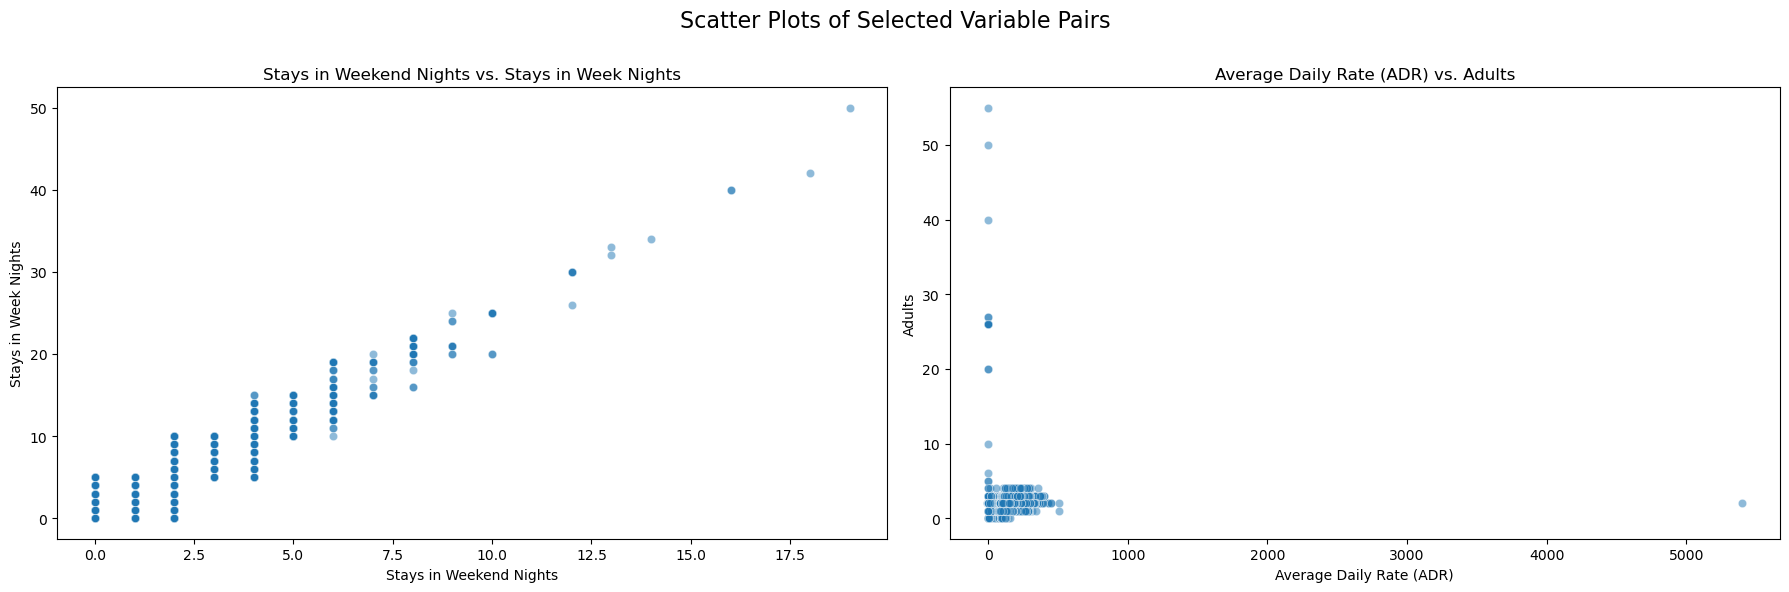

In [18]:
# Scatter plots for selected pairs of variables

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
fig.suptitle('Scatter Plots of Selected Variable Pairs', fontsize=16)

# Plot for stays_in_weekend_nights vs. stays_in_week_nights
sns.scatterplot(data=hotel_bookings, x='stays_in_weekend_nights', y='stays_in_week_nights', ax=axes[0], alpha=0.5)
axes[0].set_title('Stays in Weekend Nights vs. Stays in Week Nights')
axes[0].set_xlabel('Stays in Weekend Nights')
axes[0].set_ylabel('Stays in Week Nights')

# Plot for adr vs. adults
sns.scatterplot(data=hotel_bookings, x='adr', y='adults', ax=axes[1], alpha=0.5)
axes[1].set_title('Average Daily Rate (ADR) vs. Adults')
axes[1].set_xlabel('Average Daily Rate (ADR)')
axes[1].set_ylabel('Adults')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


### Feature Engineering

In [19]:
# Create a new feature 'total_guests'
hotel_bookings['total_guests'] = hotel_bookings['adults'] + hotel_bookings['children'] + hotel_bookings['babies']

In [20]:
# Booking duration
hotel_bookings['booking_duration'] = hotel_bookings['stays_in_weekend_nights'] + hotel_bookings['stays_in_week_nights']

In [21]:
# Booking Change Rate
hotel_bookings['booking_change_rate'] = hotel_bookings['booking_changes'] / hotel_bookings['total_guests']


### Encoding Categorical Features

In [22]:
# Encode the 'hotel' column using label encoding
hotel_bookings['hotel_encoded'] = hotel_bookings['hotel'].map({'City Hotel': 0, 'Resort Hotel': 1})

# One-Hot Encoding for nominal features
nominal_features = ['hotel', 'meal', 'market_segment', 'distribution_channel', 
                    'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status']

hotel_bookings= pd.get_dummies(data=hotel_bookings, columns=nominal_features, drop_first=True, dtype=int)

# Label Encoding for 'arrival_date_month'
month_ordering = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
month_mapping = {month: i+1 for i, month in enumerate(month_ordering)}
hotel_bookings['arrival_date_month_encoded'] = hotel_bookings['arrival_date_month'].map(month_mapping)

# Label Encoding for 'deposit_type'
deposit_mapping = {'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2}
hotel_bookings['deposit_type_encoded'] = hotel_bookings['deposit_type'].map(deposit_mapping)

# Splitting 'reservation_status_date' into year, month, and day columns
hotel_bookings['reservation_status_year'] = pd.to_datetime(hotel_bookings['reservation_status_date']).dt.year
hotel_bookings['reservation_status_month'] = pd.to_datetime(hotel_bookings['reservation_status_date']).dt.month
hotel_bookings['reservation_status_day'] = pd.to_datetime(hotel_bookings['reservation_status_date']).dt.day

# Frequency distribution of the 'country' feature to get top 10 countries
country_counts = hotel_bookings['country'].value_counts()
top_10_countries = country_counts.head(10).index.tolist()

# Group countries outside the top 10 into 'Other'
hotel_bookings['country_grouped'] = hotel_bookings['country'].apply(lambda x: x if x in top_10_countries else 'Other')

# One-Hot Encoding for the 'country_grouped' column
hotel_bookings = pd.get_dummies(data=hotel_bookings, columns=["country_grouped"], drop_first=True, dtype=int)

# Drop the encoded columns
hotel_bookings.drop(["country", "arrival_date_month", "deposit_type", "reservation_status_date"], axis=1, inplace=True)

# Display the first few rows to verify the one-hot encoding
hotel_bookings.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,booking_duration,booking_change_rate,hotel_encoded,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show,arrival_date_month_encoded,deposit_type_encoded,reservation_status_year,reservation_status_month,reservation_status_day,country_grouped_BRA,country_grouped_DEU,country_grouped_ESP,country_grouped_FRA,country_grouped_GBR,country_grouped_IRL,country_grouped_ITA,country_grouped_NLD,country_grouped_Other,country_grouped_PRT
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0.0,0.0,0,75.0,0,0,1.0,1,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,2015,7,2,0,0,0,0,1,0,0,0,0,0
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,304.0,0.0,0,75.0,0,0,1.0,1,0.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,2015,7,2,0,0,0,0,1,0,0,0,0,0
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,240.0,0.0,0,98.0,0,1,2.0,2,0.0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,2015,7,3,0,0,0,0,1,0,0,0,0,0
6,0,0,2015,27,1,0,2,2,0.0,0,0,0,0,0,0.0,0.0,0,107.0,0,0,2.0,2,0.0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,2015,7,3,0,0,0,0,0,0,0,0,0,1
7,0,9,2015,27,1,0,2,2,0.0,0,0,0,0,0,303.0,0.0,0,103.0,0,1,2.0,2,0.0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,7,0,2015,7,3,0,0,0,0,0,0,0,0,0,1


In [23]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86662 entries, 2 to 119389
Data columns (total 77 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     86662 non-null  int64  
 1   lead_time                       86662 non-null  int64  
 2   arrival_date_year               86662 non-null  int64  
 3   arrival_date_week_number        86662 non-null  int64  
 4   arrival_date_day_of_month       86662 non-null  int64  
 5   stays_in_weekend_nights         86662 non-null  int64  
 6   stays_in_week_nights            86662 non-null  int64  
 7   adults                          86662 non-null  int64  
 8   children                        86662 non-null  float64
 9   babies                          86662 non-null  int64  
 10  is_repeated_guest               86662 non-null  int64  
 11  previous_cancellations          86662 non-null  int64  
 12  previous_bookings_not_canceled  8666

In [24]:
from sklearn.model_selection import train_test_split

# Features and target variable using the correct column name
X = hotel_bookings.drop('is_canceled', axis=1)
y = hotel_bookings['is_canceled']

# Splitting the data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Splitting the temporary set into validation (50%) and test sets (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

### Base models

In [24]:
# Importing all the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Importing metrics

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score

In [26]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

/Users/pratheerth/anaconda3/envs/ds_book/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [29]:
# Accuracy on validation data

log_reg_val_acc = accuracy_score(y_val, log_reg.predict(X_val))
print("Logistic Regression Accuracy on Validation Data - ", log_reg_val_acc)

# Confusion Matrix on validation data
cm_log_reg = confusion_matrix(y_val,log_reg.predict(X_val))
print("Logistic Regression Confusion Matrix - \n", cm_log_reg)

# F1 Score
log_reg_f1 = f1_score(y_val, log_reg.predict(X_val))
print("Logistic Regression F1- Score on Validation Data - ", log_reg_f1)

# ROC-AUC score
print("Logistic Regression ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, log_reg.predict(X_val)))

Logistic Regression Accuracy on Validation Data -  0.7969074544195708
Logistic Regression Confusion Matrix - 
 [[8900  498]
 [2142 1459]]
Logistic Regression F1- Score on Validation Data -  0.5250089960417417
Logistic Regression ROC-AUC Score on Validation Data -  0.6760876170040728


In [30]:
# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
# Accuracy on validation data

dt_val_acc = accuracy_score(y_val, decision_tree.predict(X_val))
print("Decision Tree Accuracy on Validation Data - ", dt_val_acc)

# Confusion Matrix on validation data
cm_dt = confusion_matrix(y_val, decision_tree.predict(X_val))
print("Decision Tree Confusion Matrix - \n", cm_dt)

# F1 Score
decision_tree_f1 = f1_score(y_val, decision_tree.predict(X_val))
print("Decision Tree F1- Score on Validation Data - ", decision_tree_f1)

# ROC-AUC score
print("Decision Tree ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, decision_tree.predict(X_val)))

Decision Tree Accuracy on Validation Data -  1.0
Decision Tree Confusion Matrix - 
 [[9398    0]
 [   0 3601]]
Decision Tree F1- Score on Validation Data -  1.0
Decision Tree ROC-AUC Score on Validation Data -  1.0


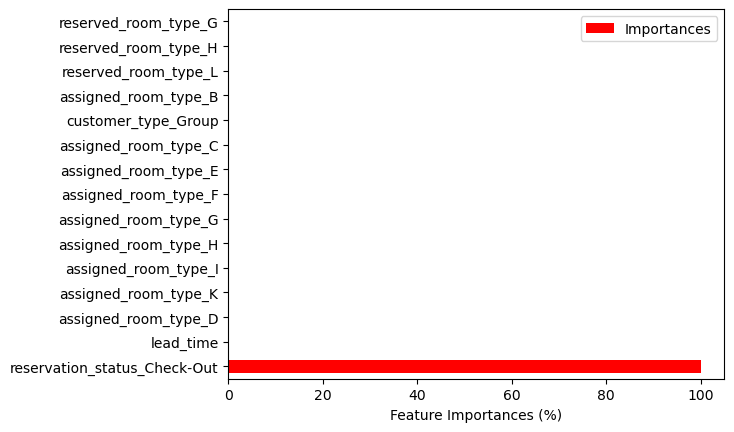

In [34]:
# Feature importance

pd.DataFrame(data = decision_tree.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# Features and target variable using the correct column name
X = hotel_bookings.drop(['is_canceled', 'reservation_status_Check-Out'], axis=1)
y = hotel_bookings['is_canceled']

# Splitting the data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Splitting the temporary set into validation (50%) and test sets (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [26]:
# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Accuracy on validation data

log_reg_val_acc = accuracy_score(y_val, log_reg.predict(X_val))
print("Logistic Regression Accuracy on Validation Data - ", log_reg_val_acc)

# Confusion Matrix on validation data
cm_log_reg = confusion_matrix(y_val,log_reg.predict(X_val))
print("Logistic Regression Confusion Matrix - \n", cm_log_reg)

# F1 Score
log_reg_f1 = f1_score(y_val, log_reg.predict(X_val))
print("Logistic Regression F1- Score on Validation Data - ", log_reg_f1)

# ROC-AUC score
print("Logistic Regression ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, log_reg.predict(X_val)))

Logistic Regression Accuracy on Validation Data -  0.78082929456112
Logistic Regression Confusion Matrix - 
 [[9202  196]
 [2653  948]]
Logistic Regression F1- Score on Validation Data -  0.3995785036880927
Logistic Regression ROC-AUC Score on Validation Data -  0.6212023521640055


/Users/pratheerth/anaconda3/envs/ds_book/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
# Train Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Accuracy on validation data

dt_val_acc = accuracy_score(y_val, decision_tree.predict(X_val))
print("Decision Tree Accuracy on Validation Data - ", dt_val_acc)

# Confusion Matrix on validation data
cm_dt = confusion_matrix(y_val, decision_tree.predict(X_val))
print("Decision Tree Confusion Matrix - \n", cm_dt)

# F1 Score
decision_tree_f1 = f1_score(y_val, decision_tree.predict(X_val))
print("Decision Tree F1- Score on Validation Data - ", decision_tree_f1)

# ROC-AUC score
print("Decision Tree ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, decision_tree.predict(X_val)))

Decision Tree Accuracy on Validation Data -  0.9308408339103008
Decision Tree Confusion Matrix - 
 [[8942  456]
 [ 443 3158]]
Decision Tree F1- Score on Validation Data -  0.8753984753984755
Decision Tree ROC-AUC Score on Validation Data -  0.9142288275720153


In [31]:
# Train Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Accuracy on validation data

rf_acc = accuracy_score(y_val, random_forest.predict(X_val))
print("Random Forest Accuracy on Validation Data - ", rf_acc)

# Confusion Matrix on validation data
cm_rf = confusion_matrix(y_val, random_forest.predict(X_val))
print("Random Forest Confusion Matrix - \n", cm_rf)

# F1 Score
rf_f1 = f1_score(y_val, random_forest.predict(X_val))
print("Random Forest F1- Score on Validation Data - ", rf_f1)

# ROC-AUC score
print("Random Forest ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, random_forest.predict(X_val)))

Random Forest Accuracy on Validation Data -  0.9336872067082084
Random Forest Confusion Matrix - 
 [[9242  156]
 [ 706 2895]]
Random Forest F1- Score on Validation Data -  0.870414912808178
Random Forest ROC-AUC Score on Validation Data -  0.8936720363139533


In [32]:
# Train Support Vector Machine

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Accuracy on validation data

svm_acc = accuracy_score(y_val, svm.predict(X_val))
print("SVM Accuracy on Validation Data - ", svm_acc)

# Confusion Matrix on validation data
cm_svm = confusion_matrix(y_val, svm.predict(X_val))
print("SVM Confusion Matrix - \n", cm_svm)

# F1 Score
svm_f1 = f1_score(y_val, svm.predict(X_val))
print("SVM F1- Score on Validation Data - ", svm_f1)

# ROC-AUC score
print("SVM ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, svm.predict(X_val)))

SVM Accuracy on Validation Data -  0.722978690668513
SVM Confusion Matrix - 
 [[9398    0]
 [3601    0]]
SVM F1- Score on Validation Data -  0.0
SVM ROC-AUC Score on Validation Data -  0.5


### Hyperparameter tuning the random forest model

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [150, 250, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9, 12, 15],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42, verbose=0),
                            param_grid=param_grid,
                          n_jobs=-1)

grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=15, max_features=None, n_estimators=150,
                       random_state=42)


In [36]:
# Accuracy on validation data

rf_gs_acc = accuracy_score(y_val, grid_search.predict(X_val))
print("Random Forest (Tuned) GS Accuracy on Validation Data - ", rf_gs_acc)

# Confusion Matrix on validation data
cm_gs_rf = confusion_matrix(y_val, grid_search.predict(X_val))
print("Random Forest (Tuned) Confusion Matrix - \n", cm_gs_rf)

# F1 Score
rf_gs_f1 = f1_score(y_val, grid_search.predict(X_val))
print("Random Forest (Tuned) F1- Score on Validation Data - ", rf_gs_f1)

# ROC-AUC score
print("Random Forest (Tuned) ROC-AUC Score on Validation Data - ", roc_auc_score(y_val, grid_search.predict(X_val)))

Random Forest (Tuned) GS Accuracy on Validation Data -  0.947919070697746
Random Forest (Tuned) Confusion Matrix - 
 [[9319   79]
 [ 598 3003]]
Random Forest (Tuned) F1- Score on Validation Data -  0.8986981894358821
Random Forest (Tuned) ROC-AUC Score on Validation Data -  0.9127644871057135


### RF on Testing Dataset

In [38]:
# Accuracy on testing data

rf_gs_acc = accuracy_score(y_test, grid_search.predict(X_test))
print("Random Forest (Tuned) GS Accuracy on Test Data - ", rf_gs_acc)

# Confusion Matrix on validation data
cm_gs_rf = confusion_matrix(y_test, grid_search.predict(X_test))
print("Random Forest (Tuned) Confusion Matrix on Test Data - \n", cm_gs_rf)

# F1 Score
rf_gs_f1 = f1_score(y_test, grid_search.predict(X_test))
print("Random Forest (Tuned) F1- Score on Test Data - ", rf_gs_f1)

# ROC-AUC score
print("Random Forest (Tuned) ROC-AUC Score on Test Data - ", roc_auc_score(y_test, grid_search.predict(X_test)))

Random Forest (Tuned) GS Accuracy on Test Data -  0.9456153846153846
Random Forest (Tuned) Confusion Matrix on Test Data - 
 [[9312   86]
 [ 621 2981]]
Random Forest (Tuned) F1- Score on Test Data -  0.8939871045134203
Random Forest (Tuned) ROC-AUC Score on Test Data -  0.9092224484777617


In [ ]:
# Feature importance

pd.DataFrame(data = random_forest.feature_importances_*100,
                   columns = ["Importances"],
                   index = X_train.columns).sort_values("Importances", ascending = False)[:15].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances (%)")
plt.show()